In [1]:
words = open('../Lectures/lecture 2/names.txt','r').read().splitlines()

In [2]:
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [3]:
#make trigrams 
b = {}

for w in words: 
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2, ch3 in zip(chs, chs[1:], chs[2:]):
        trigram = (ch1, ch2, ch3)
        b[trigram] = b.get(trigram, 0) + 1


In [4]:
sorted(b.items(), key = lambda kv: -kv[1])

[(('a', 'h', '.'), 1714),
 (('n', 'a', '.'), 1673),
 (('a', 'n', '.'), 1509),
 (('o', 'n', '.'), 1503),
 (('.', 'm', 'a'), 1453),
 (('.', 'j', 'a'), 1255),
 (('.', 'k', 'a'), 1254),
 (('e', 'n', '.'), 1217),
 (('l', 'y', 'n'), 976),
 (('y', 'n', '.'), 953),
 (('a', 'r', 'i'), 950),
 (('i', 'a', '.'), 903),
 (('i', 'e', '.'), 858),
 (('a', 'n', 'n'), 825),
 (('e', 'l', 'l'), 822),
 (('a', 'n', 'a'), 804),
 (('i', 'a', 'n'), 790),
 (('m', 'a', 'r'), 776),
 (('i', 'n', '.'), 766),
 (('e', 'l', '.'), 727),
 (('y', 'a', '.'), 716),
 (('a', 'n', 'i'), 703),
 (('.', 'd', 'a'), 700),
 (('l', 'a', '.'), 684),
 (('e', 'r', '.'), 683),
 (('i', 'y', 'a'), 669),
 (('l', 'a', 'n'), 647),
 (('.', 'b', 'r'), 646),
 (('n', 'n', 'a'), 633),
 (('.', 'a', 'l'), 632),
 (('.', 'c', 'a'), 628),
 (('r', 'a', '.'), 627),
 (('n', 'i', '.'), 625),
 (('.', 'a', 'n'), 623),
 (('n', 'n', '.'), 619),
 (('n', 'e', '.'), 607),
 (('e', 'e', '.'), 605),
 (('e', 'y', '.'), 602),
 (('.', 'k', 'e'), 601),
 (('a', 'l', 'e')

In [5]:
import torch

In [6]:
N = torch.zeros((27,27,27), dtype = torch.int32)

In [7]:
N

tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        ...,

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0,

In [8]:
chars = sorted(list(set(''.join(words))))
StoI = {s:i+1 for i,s in enumerate(chars)}
StoI['.'] = 0
ItoS = {i:s for s,i in StoI.items()}

In [9]:
for w in words: 
    chs = ['.'] + list(w) + ['.']
    for ch1,ch2,ch3 in zip(chs,chs[1:], chs[2:]):
        ix1 = StoI[ch1]
        ix2 = StoI[ch2]
        ix3 = StoI[ch3]
        N[ix1,ix2,ix3] += 1

In [10]:
N

tensor([[[  0,   0,   0,  ...,   0,   0,   0],
         [  0, 207, 190,  ...,  27, 173, 152],
         [  0, 169,   0,  ...,   0,   4,   0],
         ...,
         [  0,  57,   0,  ...,   1,  17,  11],
         [  0, 246,   0,  ...,   0,   0,   2],
         [  0, 456,   0,  ...,   0,  91,   1]],

        [[  0,   0,   0,  ...,   0,   0,   0],
         [ 40,   0,   5,  ...,   0,  20,  11],
         [ 36,  28,  20,  ...,   0,  12,   0],
         ...,
         [ 11,   5,   0,  ...,  17,   6,   3],
         [163, 389,  13,  ...,   0,  16,  40],
         [ 38, 123,   0,  ...,   0,  12,  22]],

        [[  0,   0,   0,  ...,   0,   0,   0],
         [ 46,   5,   5,  ...,   4,  31,   4],
         [  1,   8,   0,  ...,   0,   9,   0],
         ...,
         [  0,   0,   0,  ...,   0,   0,   0],
         [ 55,   4,   1,  ...,   0,   0,   0],
         [  0,   0,   0,  ...,   0,   0,   0]],

        ...,

        [[  0,   0,   0,  ...,   0,   0,   0],
         [ 10,   0,   2,  ...,   0,  10,   0]

In [11]:
#convert this to probabilities
p = N[0][1].float() #convert to floats to normalize these counts, we want a probability distribution

p = p / p.sum()

p

tensor([0.0000, 0.0469, 0.0431, 0.0070, 0.0830, 0.0125, 0.0048, 0.0039, 0.0206,
        0.0349, 0.0061, 0.0170, 0.1433, 0.0871, 0.1413, 0.0023, 0.0039, 0.0020,
        0.1093, 0.0440, 0.0163, 0.0345, 0.0551, 0.0014, 0.0061, 0.0392, 0.0345])

In [12]:
#we use torch.multinomial. it returns us integers samples according to the probability distribution we give it. We will also use a generator object in pytorch to make 
#this deterministc for pedagogical purposes
g = torch.Generator().manual_seed(2147483647)
ix = torch.multinomial(p,num_samples = 2 , replacement=True, generator=g)[0].item()
ix
ItoS[ix]

'r'

In [13]:
#create probability distribution instead of calculating it for every letter
#We add a fake count of +1 to every trigram to avoid getting infinite loss when calculating loss using trigrams that have a 0% probability of showing up due to them being crazy combos like jq
#This is called model smoothing. add as much as you want. its a tradeoff. find goldilocks to minimise loss on validation data 
P = (N+1).float()
#This operation is broadcastable due to Torch Broadcasting semantics. You can check for this in the future. Important to specify keepdim = true so it normalizes the rows and not the columns.
P /= P.sum(2,keepdim= True)

In [14]:
#Check that normalization worked
P[0][1].sum()

tensor(1.0000)

In [15]:
g = torch.Generator().manual_seed(2147483647)

out = []
ix1 = 0  # Initial index for the 1st character (e.g., start with some specific character)
ix2 = 0  # Initial index for the 2nd character

for i in range(20):
    while True:
        p = P[ix1, ix2]  # Trigram probabilities given (1st char, 2nd char)
        
        # Normalize the probabilities for the 3rd character
        p = p / p.sum()
        
        # Sample the next character (3rd character) from the trigram distribution
        ix3 = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        
        # Append the sampled character to the output
        out.append(ItoS[ix3])
        
        # Update the character indices: shift the previous second character to the first, and set the new third character
        ix1, ix2 = ix2, ix3
        
        # If the end character (ix3 == 0) is reached, break
        if ix3 == 0:
            break

print(''.join(out))


junide.ilyasid.prelay.ocin.fairritoper.sathen.dannaaryanileniassibduinrwin.lessiyanayla.te.farmumthyfortumj.ponn.zena.jaylicore.ya.zoffra.jamilyn.fmouis.yah.wanaasnhavi.honszxhddion.


In [16]:
#We have "trained" this trigram model by teaching it the statistics of the names, and the probability distribution that it made can be thought of as it's parameters. 
# How do we evaluate the quality of this? We can measure how much information we learned from the probaliities that the trigam model has been taught
# If every letter was equally likely it they would have a probability of 4%, or 0.04. So any probablitity observed higher than this represents information gain

#A measure of quality of this is referered to as the "likelihood", which is just a product of all the probabliities. We will work with the Log Likelihood because our probablities are less than 
# one. If we just took the likelihood we'd get a super small number
log_likelihood = 0.0
#We use log likelihood for convenience's sake. Log(a*b*c) = log(a) + log(b) + log(c). So it's just a summation of the log of all the probabilities
n = 0
for w in words: 
    chs = ['.'] + list(w) + ['.']
    for ch1,ch2,ch3 in zip(chs,chs[1:],chs[2:]):
        ix1 = StoI[ch1]
        ix2 = StoI[ch2]
        ix3 = StoI[ch3]
        prob = P[ix1,ix2,ix3]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n += 1
        print(f'{ch1}{ch2}{ch3}: {prob:.4f} {logprob:.4f}')
    
print(f'{log_likelihood=}')
nll = -log_likelihood
print(f'{nll=}')
print(f'Average Log Likelihood (normalised) {nll/n}')
#Normal loglikelihood doesn't really align with the semantics of a loss function, where we want lower to be better. The higher the probabliiteis are to 1, the more our loglikelihood will be 0,
#and the worse they are the more infinitely negative our loglikelihood will become. we want to minimise this number, not maximise (by bringing closest to 0 as possible), so we do neg log likelihood
#A high quality model would be one obtained from training where we mninimise this average log likelihood. the number is 2.42 for our current "stupid" trigram model

.em: 0.1855 -1.6847
emm: 0.1269 -2.0645
mma: 0.3744 -0.9825
ma.: 0.0669 -2.7050
.ol: 0.2494 -1.3887
oli: 0.1084 -2.2223
liv: 0.0219 -3.8195
ivi: 0.2669 -1.3209
via: 0.1578 -1.8465
ia.: 0.3657 -1.0060
.av: 0.0550 -2.9006
ava: 0.1882 -1.6705
va.: 0.1405 -1.9625
.is: 0.2023 -1.5982
isa: 0.1065 -2.2398
sab: 0.0627 -2.7693
abe: 0.3063 -1.1831
bel: 0.2962 -1.2168
ell: 0.2513 -1.3811
lla: 0.2464 -1.4010
la.: 0.2585 -1.3529
.so: 0.0735 -2.6106
sop: 0.0394 -3.2333
oph: 0.3115 -1.1664
phi: 0.2684 -1.3153
hia: 0.1085 -2.2213
ia.: 0.3657 -1.0060
.ch: 0.2250 -1.4917
cha: 0.3430 -1.0701
har: 0.1453 -1.9289
arl: 0.0875 -2.4360
rlo: 0.1023 -2.2801
lot: 0.0209 -3.8698
ott: 0.2414 -1.4214
tte: 0.3042 -1.1899
te.: 0.2369 -1.4402
.mi: 0.1536 -1.8734
mia: 0.0748 -2.5926
ia.: 0.3657 -1.0060
.am: 0.0868 -2.4445
ame: 0.1367 -1.9902
mel: 0.2237 -1.4976
eli: 0.1643 -1.8062
lia: 0.2070 -1.5749
ia.: 0.3657 -1.0060
.ha: 0.5616 -0.5770
har: 0.1453 -1.9289
arp: 0.0027 -5.9017
rpe: 0.1463 -1.9218
per: 0.3482 -1.0549


In [17]:
#Currently our parameters which is a likelihood table has been explicitly defined. We can also calculate these probabilities with a neural net! 

#Our neural net will still be a character level trigram model, but we'll just try to get it to learn these probabliities 

#Create the training set of all trigrams (x,y,z):
xs , ys , zs = [], [] , []
for w in words[:1]: 
    chs = ['.'] + list(w) + ['.']
    for ch1,ch2,ch3 in zip(chs,chs[1:], chs[2:]):
        ix1 = StoI[ch1]
        ix2 = StoI[ch2]
        ix3 = StoI[ch3]
        print(ch1,ch2,ch3)
        xs.append(ix1)
        ys.append(ix2)
        zs.append(ix3)

xs = torch.tensor(xs)
ys = torch.tensor(ys)
zs = torch.tensor(zs)

        

. e m
e m m
m m a
m a .


Time for forward pass! 

In [18]:
import torch.nn.functional as F
import matplotlib.pyplot as plt

xenc = F.one_hot(xs,num_classes = 27).float()
yenc = F.one_hot(ys,num_classes = 27).float()
print(xenc.shape)
print(yenc.shape)

torch.Size([4, 27])
torch.Size([4, 27])


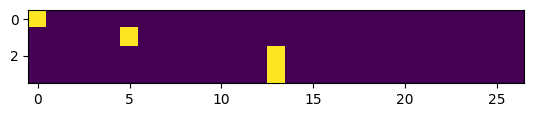

In [19]:
plt.imshow(xenc)

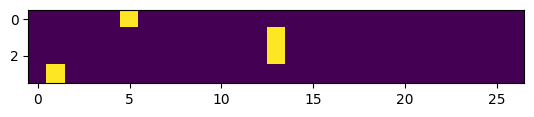

In [20]:
plt.imshow(yenc)

In [21]:
#Neurons do w * x + b, w = weight, b = bias.
# our x's are two vectors. i'm gonna choose to combine these into a matrix so w * x becomes a matmul. I'm gonna combine xenc and yenc into a matrix using the concatenation method along their last dimensions
input_concat = torch.cat([xenc, yenc], dim=1)
W_concat = torch.randn(2 * 27, 27)
output_concat = torch.matmul(input_concat, W_concat)

probs_concat = F.softmax(output_concat, dim=1)
probs_concat

tensor([[3.3244e-01, 1.6516e-02, 9.4014e-02, 9.5131e-03, 1.9000e-02, 7.0925e-03,
         1.1371e-02, 1.2483e-02, 1.1399e-02, 1.0366e-02, 2.7813e-02, 3.7380e-02,
         2.8404e-02, 1.2741e-01, 8.1379e-03, 2.3169e-03, 3.1445e-04, 3.4093e-03,
         7.4378e-02, 2.1373e-02, 3.0629e-02, 1.2442e-02, 2.1633e-02, 3.7384e-03,
         8.5741e-03, 8.4564e-03, 5.9395e-02],
        [1.7278e-02, 2.0185e-02, 1.0100e-02, 1.1662e-03, 4.0418e-02, 2.9566e-02,
         3.1683e-02, 2.7614e-02, 7.2366e-04, 5.5001e-04, 1.8738e-03, 1.2147e-02,
         6.1245e-03, 7.3550e-03, 4.9884e-03, 3.4719e-04, 5.5656e-01, 5.6970e-02,
         1.7942e-02, 6.5988e-03, 1.0500e-01, 2.6354e-02, 5.0276e-04, 5.7979e-03,
         5.7742e-03, 4.5528e-03, 1.8273e-03],
        [6.0350e-02, 2.0970e-02, 1.7559e-02, 3.4435e-03, 2.1573e-01, 1.3473e-02,
         2.1744e-02, 3.4478e-03, 2.3009e-03, 1.0640e-03, 5.6248e-03, 1.0136e-02,
         4.2582e-04, 1.5322e-03, 7.9261e-03, 1.4014e-03, 3.5670e-01, 1.3967e-01,
         2.7312e-

In [22]:
#SUmmary

In [23]:
xs

tensor([ 0,  5, 13, 13])

In [24]:
ys

tensor([ 5, 13, 13,  1])

In [25]:
#randomly initialise 27 neurons' weights. each neuron recieves 27 inputs
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27,27,27), generator= g)

In [26]:
xenc = F.one_hot(xs,num_classes = 27).float()#inputs to the network, onehot encoding
yenc = F.one_hot(ys,num_classes = 27).float()#inputs to the network, onehot encoding

input_concat = torch.cat([xenc, yenc], dim=1)
W_concat = torch.randn(2 * 27, 27)
output_concat = torch.matmul(input_concat, W_concat)#These 3 lines of code represent a matrix multiplication between our weights matrix and our input matrix which is just a concatenation of our two input vertices

In [27]:
probs_concat = F.softmax(output_concat, dim=1) #softmax function, we exponentiate the neuron activations, then normalise them so we can interpret them as probabilities
probs_concat

tensor([[0.0037, 0.1370, 0.0029, 0.0258, 0.0014, 0.0004, 0.0034, 0.0512, 0.0115,
         0.0080, 0.0135, 0.0050, 0.0655, 0.0261, 0.0012, 0.0013, 0.0014, 0.0038,
         0.0699, 0.0076, 0.0010, 0.0096, 0.0267, 0.0033, 0.0275, 0.2235, 0.2680],
        [0.0984, 0.1155, 0.0448, 0.0040, 0.0052, 0.0259, 0.0050, 0.0202, 0.0070,
         0.0294, 0.0114, 0.0275, 0.0542, 0.0087, 0.0226, 0.0435, 0.0142, 0.0250,
         0.1192, 0.0034, 0.0037, 0.0040, 0.0327, 0.0462, 0.1010, 0.0149, 0.1124],
        [0.0217, 0.0404, 0.0719, 0.0038, 0.0023, 0.0109, 0.0053, 0.0445, 0.0090,
         0.0593, 0.0132, 0.0052, 0.1187, 0.0016, 0.0303, 0.0631, 0.0022, 0.0014,
         0.0449, 0.0035, 0.0204, 0.0010, 0.0032, 0.1937, 0.1093, 0.0271, 0.0919],
        [0.0145, 0.0393, 0.0339, 0.0139, 0.0061, 0.0659, 0.0686, 0.1213, 0.0178,
         0.0175, 0.0676, 0.0348, 0.0058, 0.0024, 0.0637, 0.0149, 0.0004, 0.0037,
         0.0279, 0.0344, 0.0248, 0.0016, 0.0081, 0.1518, 0.0805, 0.0288, 0.0500]])

In [28]:
nlls = torch.zeros(4)
for i in range(4):
    # i-th trigram
    x = xs[i].item()  # character index two steps back
    y = ys[i].item()  # character index one step back
    z = zs[i].item()  # label character index (next character)
    print('------------')
    print(f'trigram example {i+1}: {ItoS[x]} {ItoS[y]} {ItoS[z]} (indexes {x},{y},{z})')
    print('inputs to the neural net:', x, y)
    print('output probabilities from the neural net:', probs_concat[i])
    print('label (actual next character):', z)
    p = probs_concat[i, z]
    print('probability assigned by the net to the correct character:', p.item())
    logp = torch.log(p)
    print('log likelihood:', logp.item())
    nll = -logp
    print("negative log likelihood:", nll.item())
    nlls[i] = nll

print("=================")
print("average negative log likelihood, i.e. loss =", nlls.mean().item())

------------
trigram example 1: . e m (indexes 0,5,13)
inputs to the neural net: 0 5
output probabilities from the neural net: tensor([0.0037, 0.1370, 0.0029, 0.0258, 0.0014, 0.0004, 0.0034, 0.0512, 0.0115,
        0.0080, 0.0135, 0.0050, 0.0655, 0.0261, 0.0012, 0.0013, 0.0014, 0.0038,
        0.0699, 0.0076, 0.0010, 0.0096, 0.0267, 0.0033, 0.0275, 0.2235, 0.2680])
label (actual next character): 13
probability assigned by the net to the correct character: 0.02609521895647049
log likelihood: -3.646003246307373
negative log likelihood: 3.646003246307373
------------
trigram example 2: e m m (indexes 5,13,13)
inputs to the neural net: 5 13
output probabilities from the neural net: tensor([0.0984, 0.1155, 0.0448, 0.0040, 0.0052, 0.0259, 0.0050, 0.0202, 0.0070,
        0.0294, 0.0114, 0.0275, 0.0542, 0.0087, 0.0226, 0.0435, 0.0142, 0.0250,
        0.1192, 0.0034, 0.0037, 0.0040, 0.0327, 0.0462, 0.1010, 0.0149, 0.1124])
label (actual next character): 13
probability assigned by the net to the

In [29]:
#lets do some gradient based optimization :) 
#randomly initialise 27 neurons' weights. each neuron recieves 27 inputs
g = torch.Generator().manual_seed(2147483647)
W_concat = torch.randn(2 * 27, 27, requires_grad= True)

#W = torch.randn((27,27,27), generator= g, requires_grad=True)


In [30]:
#Forward pass! 
xenc = F.one_hot(xs,num_classes = 27).float()#inputs to the network, onehot encoding
yenc = F.one_hot(ys,num_classes = 27).float()#inputs to the network, onehot encoding

input_concat = torch.cat([xenc, yenc], dim=1)
output_concat = torch.matmul(input_concat, W_concat)#These 3 lines of code represent a matrix multiplication between our weights matrix and our input matrix which is just a 
                                                    #concatenation of our two input vertices
probs_concat = F.softmax(output_concat, dim=1) #softmax function, we exponentiate the neuron activations, then normalise them so we can interpret them as probabilities
#loss = -output_concat[torch.arange(4), ys].log().mean()
#loss = -output_concat[torch.arange(output_concat.shape[0]), ys].log().mean()  # Compute loss
loss = -probs_concat[torch.arange(probs_concat.shape[0]), ys].log().mean()  # Compute loss

print("loss: ", loss.item())

loss:  4.54429292678833


In [31]:
#Do a backwards pass! 
#backward pass! 
W_concat.grad = None #reset gradients to 0 
loss.backward() #magic! pytorch did the same thing as micrograd and preserved a computational graph. 

In [32]:
W_concat.data += -0.1*W_concat.grad

In [33]:
for k in range(200):
    #forward pass
    xenc = F.one_hot(xs,num_classes = 27).float()#inputs to the network, onehot encoding
    yenc = F.one_hot(ys,num_classes = 27).float()#inputs to the network, onehot encoding
    input_concat = torch.cat([xenc, yenc], dim=1)
    output_concat = torch.matmul(input_concat, W_concat)#These 3 lines of code represent a matrix multiplication between our weights matrix and our input matrix which is just a 
                                                        #concatenation of our two input vertices
    probs_concat = F.softmax(output_concat, dim=1) #softmax function, we exponentiate the neuron activations, then normalise them so we can interpret them as probabilities
    loss = -probs_concat[torch.arange(probs_concat.shape[0]), ys].log().mean()  # Compute loss

    print("loss: ", loss.item())

    #backward pass!
    W_concat.grad = None #reset gradients to 0 
    loss.backward() #magic! pytorch did the same thing as micrograd and preserved a computational graph. 
    W_concat.data += -0.1*W_concat.grad

loss:  4.471181869506836
loss:  4.398416519165039
loss:  4.326000690460205
loss:  4.253939151763916
loss:  4.182237148284912
loss:  4.110900402069092
loss:  4.039935111999512
loss:  3.9693472385406494
loss:  3.8991451263427734
loss:  3.8293349742889404
loss:  3.7599263191223145
loss:  3.6909279823303223
loss:  3.622349262237549
loss:  3.5542004108428955
loss:  3.48649263381958
loss:  3.4192371368408203
loss:  3.3524460792541504
loss:  3.286132335662842
loss:  3.2203094959259033
loss:  3.154991626739502
loss:  3.090193510055542
loss:  3.025930881500244
loss:  2.96221923828125
loss:  2.899075984954834
loss:  2.836517810821533
loss:  2.7745635509490967
loss:  2.713231325149536
loss:  2.6525402069091797
loss:  2.5925087928771973
loss:  2.533158540725708
loss:  2.474508285522461
loss:  2.416579484939575
loss:  2.3593924045562744
loss:  2.3029680252075195
loss:  2.247326612472534
loss:  2.1924891471862793
loss:  2.1384761333465576
loss:  2.0853073596954346
loss:  2.0330026149749756
loss:  1.

In [34]:
W_concat

tensor([[-1.1240, -1.4568, -0.9578,  ...,  0.1131, -0.7170,  0.2158],
        [-1.4605, -1.4527,  1.2803,  ..., -0.7243, -0.8359,  1.7290],
        [ 1.3875, -1.6802,  0.2904,  ...,  2.2041,  0.6950,  0.2276],
        ...,
        [ 0.5038, -1.5594,  0.7115,  ...,  0.8088, -0.4548,  0.7261],
        [-0.0266, -2.7128, -0.0252,  ..., -0.1662, -2.0597,  0.0268],
        [-1.3616, -1.3793, -1.1541,  ...,  1.0382,  0.4037, -2.7268]],
       requires_grad=True)

In [35]:
g = torch.Generator().manual_seed(2147483647)
print(W_concat)
# Starting characters
ix1 = 0  # Index for the first character (e.g., start with '<.>')
ix2 = 0  # Index for the second character

out = []

for i in range(5):  # Generate 5 sequences
    current_out = []  # Store output for this sequence
    while True:
        # Prepare input for the network
        xenc = F.one_hot(torch.tensor(ix1), num_classes=27).float()
        yenc = F.one_hot(torch.tensor(ix2), num_classes=27).float()
        input_concat = torch.cat([xenc, yenc], dim=0).unsqueeze(0)  # Add batch dimension
        output_concat = torch.matmul(input_concat, W_concat)
        
        # Get probabilities
        probs_concat = F.softmax(output_concat, dim=1)
        
        # Sample the next character
        ix3 = torch.multinomial(probs_concat, num_samples=1, generator= g).item()
        
        # Append the sampled character to the output
        current_out.append(ItoS[ix3])
        
        # Update the indices
        ix1, ix2 = ix2, ix3
        
        # Break if end character is reached
        if ix3 == 0:  # Assuming 0 is the end character
            break
            
    out.append(''.join(current_out))  # Store the generated sequence

print('Generated Sequences:', out)


tensor([[-1.1240, -1.4568, -0.9578,  ...,  0.1131, -0.7170,  0.2158],
        [-1.4605, -1.4527,  1.2803,  ..., -0.7243, -0.8359,  1.7290],
        [ 1.3875, -1.6802,  0.2904,  ...,  2.2041,  0.6950,  0.2276],
        ...,
        [ 0.5038, -1.5594,  0.7115,  ...,  0.8088, -0.4548,  0.7261],
        [-0.0266, -2.7128, -0.0252,  ..., -0.1662, -2.0597,  0.0268],
        [-1.3616, -1.3793, -1.1541,  ...,  1.0382,  0.4037, -2.7268]],
       requires_grad=True)
Generated Sequences: ['vuzibmdzlkaqwhjuqlfaawecnzr.', 'siirttoecdgsfuhlzugegnpduzffibevhocedbddilmwibtlzsnjqqnartaftbzffvmumehyf.', 'dtumjmcffyszfjqoeagqksfixlynevocceypinbalwcdzmbiimwyfinpqghdsnrtjfccc.', 'szxhldgosffxnprtixuieepmnartymtartjbsli.', 'yeemmmmmmmmmmmmmmmmmmmmmmmmmmmmmmaarzjfuhucdzixbfcc.']
